In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os
from glob import glob
import pickle
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, TimeDistributed, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, LeakyReLU, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K
from keras.utils import np_utils
#from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [ ]:

X_train = pickle.load(open('/content/drive/MyDrive/train_test_logmel_aug/[ADReSS][MEL_SPECT][X_train].p', 'rb'))
y_train = pickle.load(open('/content/drive/MyDrive/train_test_logmel_aug/[ADReSS][MEL_SPECT][y_train].p', 'rb'))
y_test = pickle.load(open('/content/drive/MyDrive/train_test_logmel_aug/[ADReSS][MEL_SPECT][y_test].p', 'rb'))
X_test = pickle.load(open('/content/drive/MyDrive/train_test_logmel_aug/[ADReSS][MEL_SPECT][X_test].p', 'rb'))

In [ ]:
test_y=pickle.load(open('/content/drive/MyDrive/train_test_logmel_aug/[ADReSS][testy].p', 'rb'))
test_x=pickle.load(open('/content/drive/MyDrive/train_test_logmel_aug/[ADReSS][testx].p', 'rb'))

In [ ]:

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(np.ravel(y_train)))
y_test = np_utils.to_categorical(lb.transform(np.ravel(y_test)))

In [ ]:
test_y=np_utils.to_categorical(lb.transform(np.ravel(test_y)))

In [ ]:

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , X_train.shape[2], X_train.shape[3], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , X_test.shape[2], X_test.shape[3], 1)

In [ ]:
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1] , test_x.shape[2], test_x.shape[3], 1)

In [ ]:
X_train.shape

(258, 5, 128, 128, 1)

In [ ]:
X_test.shape

(22, 5, 128, 128, 1)

In [ ]:
y_train.shape

(258, 2)

In [ ]:
test_x.shape

(48, 5, 128, 128, 1)

In [ ]:

input_y = Input(shape=X_train.shape[1:], name='Input_MELSPECT')

y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_1_MELSPECT')(input_y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_1_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_1_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'), name='MaxPool_1_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_1_MELSPECT')(y)     

y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_2_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_2_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_2_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_2_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_2_MELSPECT')(y)

y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_3_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_3_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_3_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_3_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_3_MELSPECT')(y)

y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_4_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_4_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_4_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_4_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_4_MELSPECT')(y)  

y = TimeDistributed(Flatten(), name='Flat_MELSPECT')(y)                      
                               
y = LSTM(64, return_sequences=False, dropout=0.2, name='LSTM_1')(y)
#y = Dense(64, activation='relu', name='FC1')(y)
y = Dense(y_train.shape[1], activation='softmax', name='FC')(y)


model = Model(inputs=input_y, outputs=y)


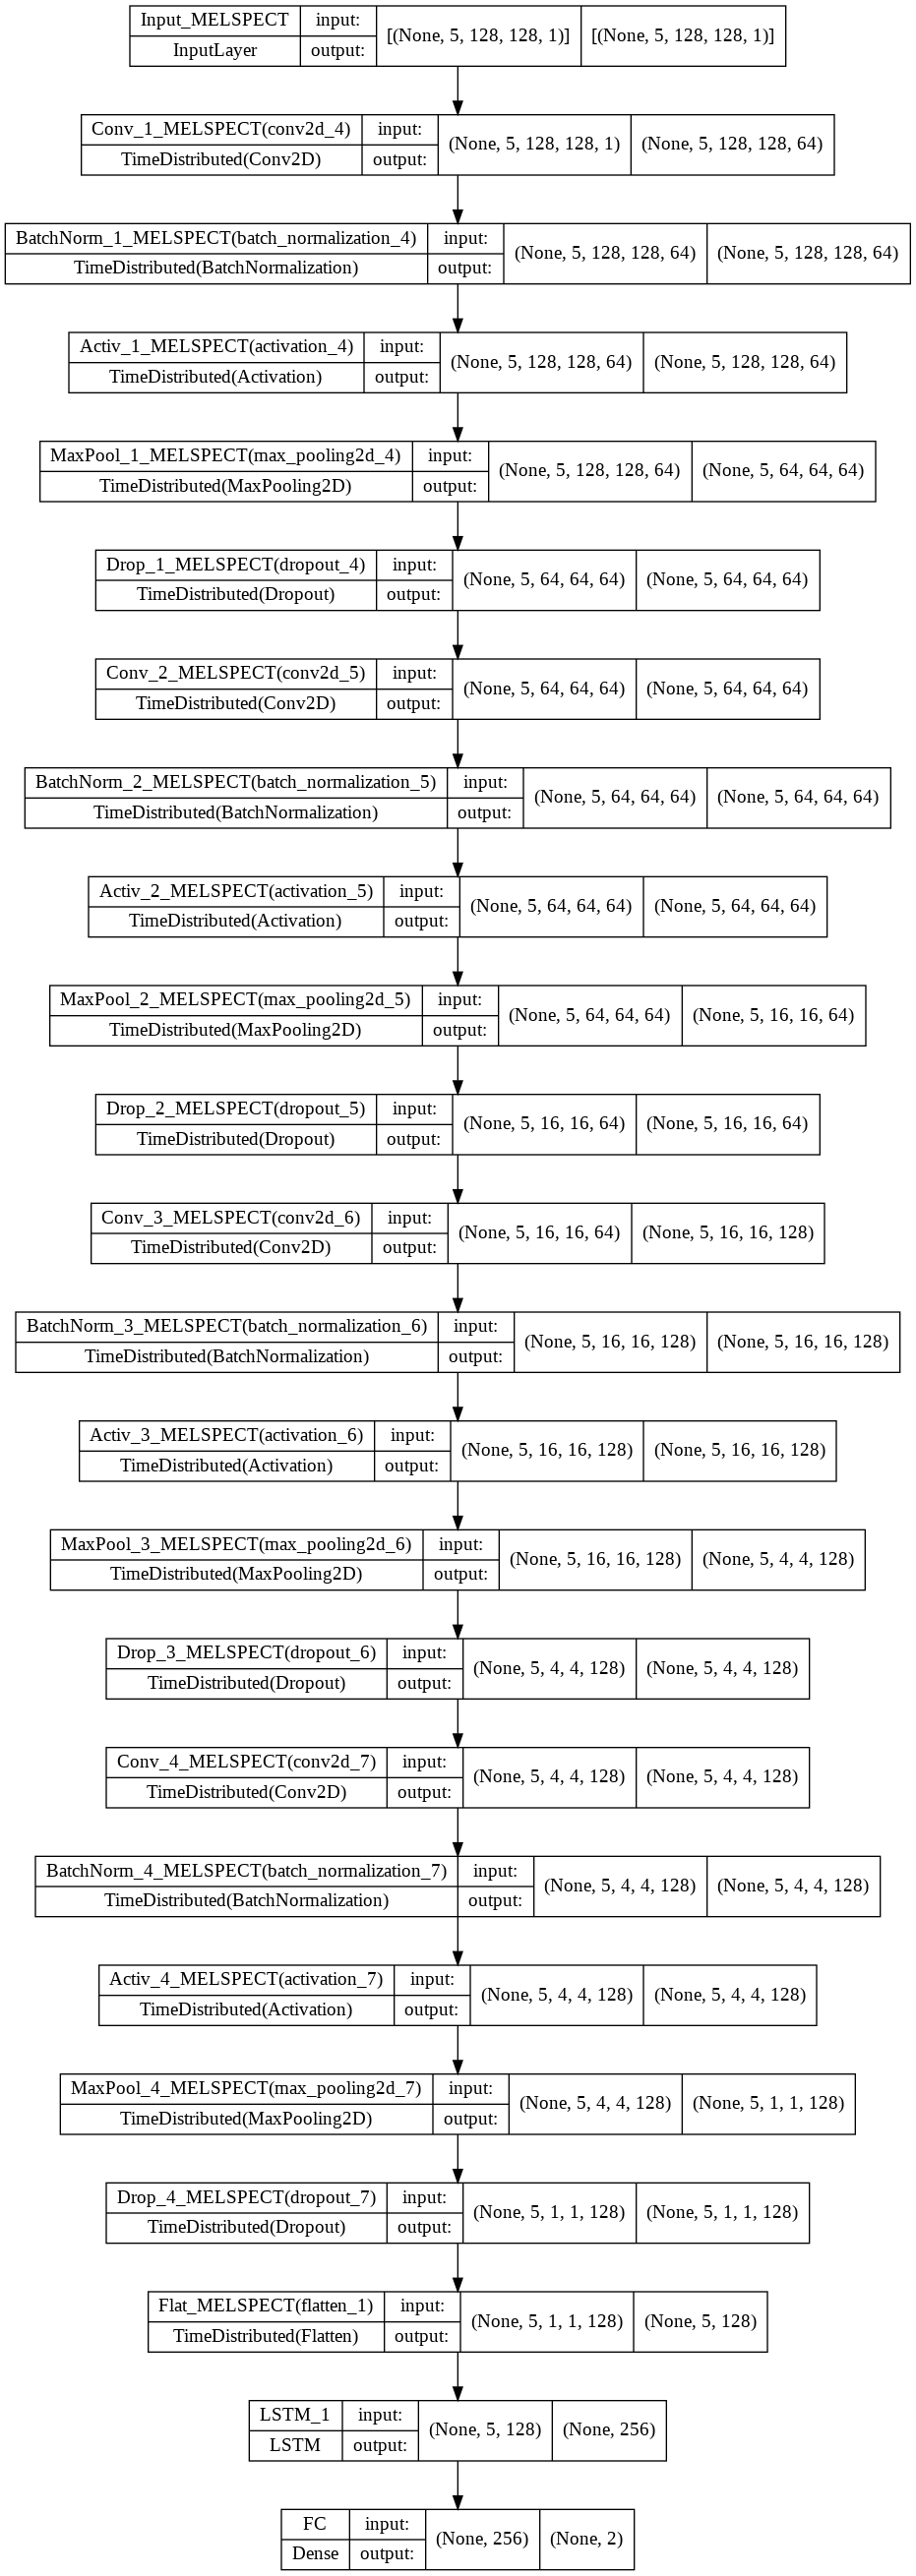

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

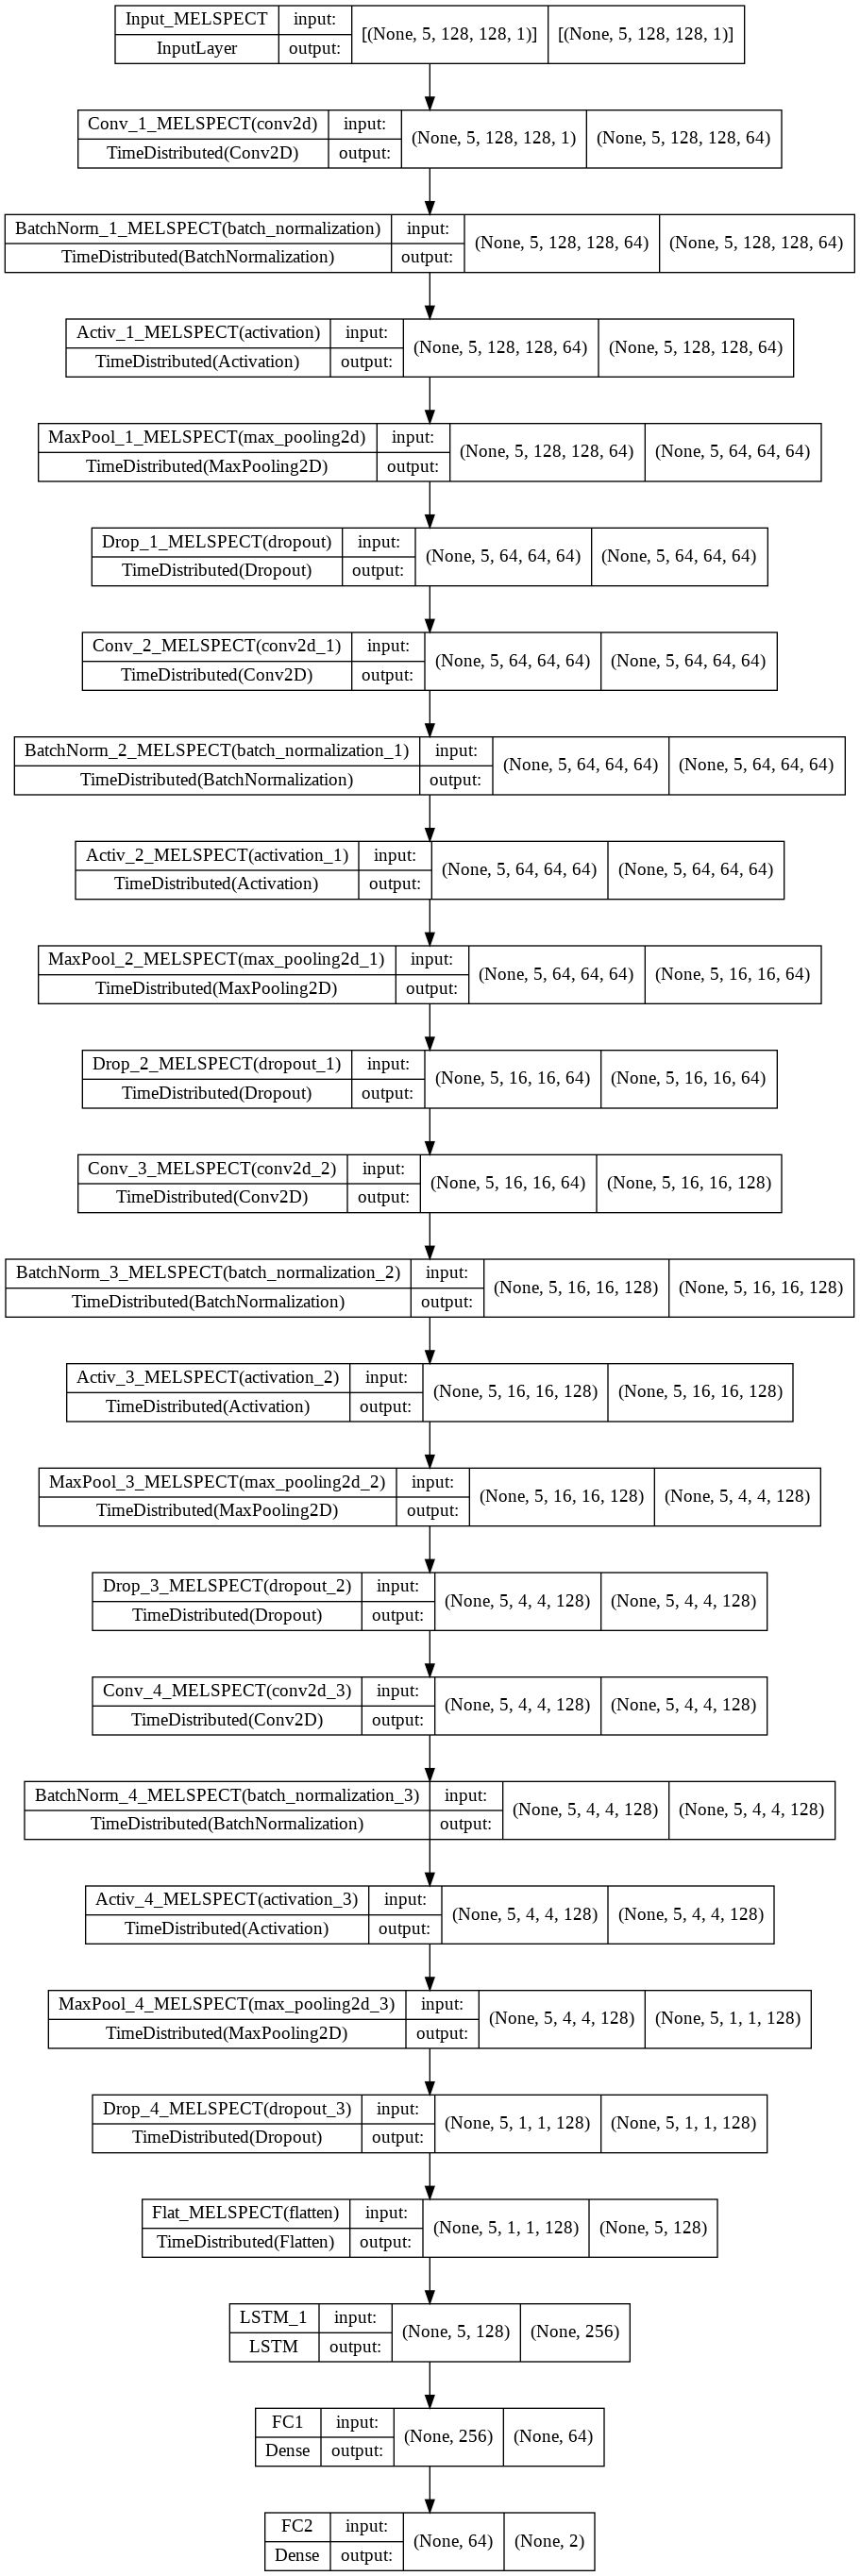

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

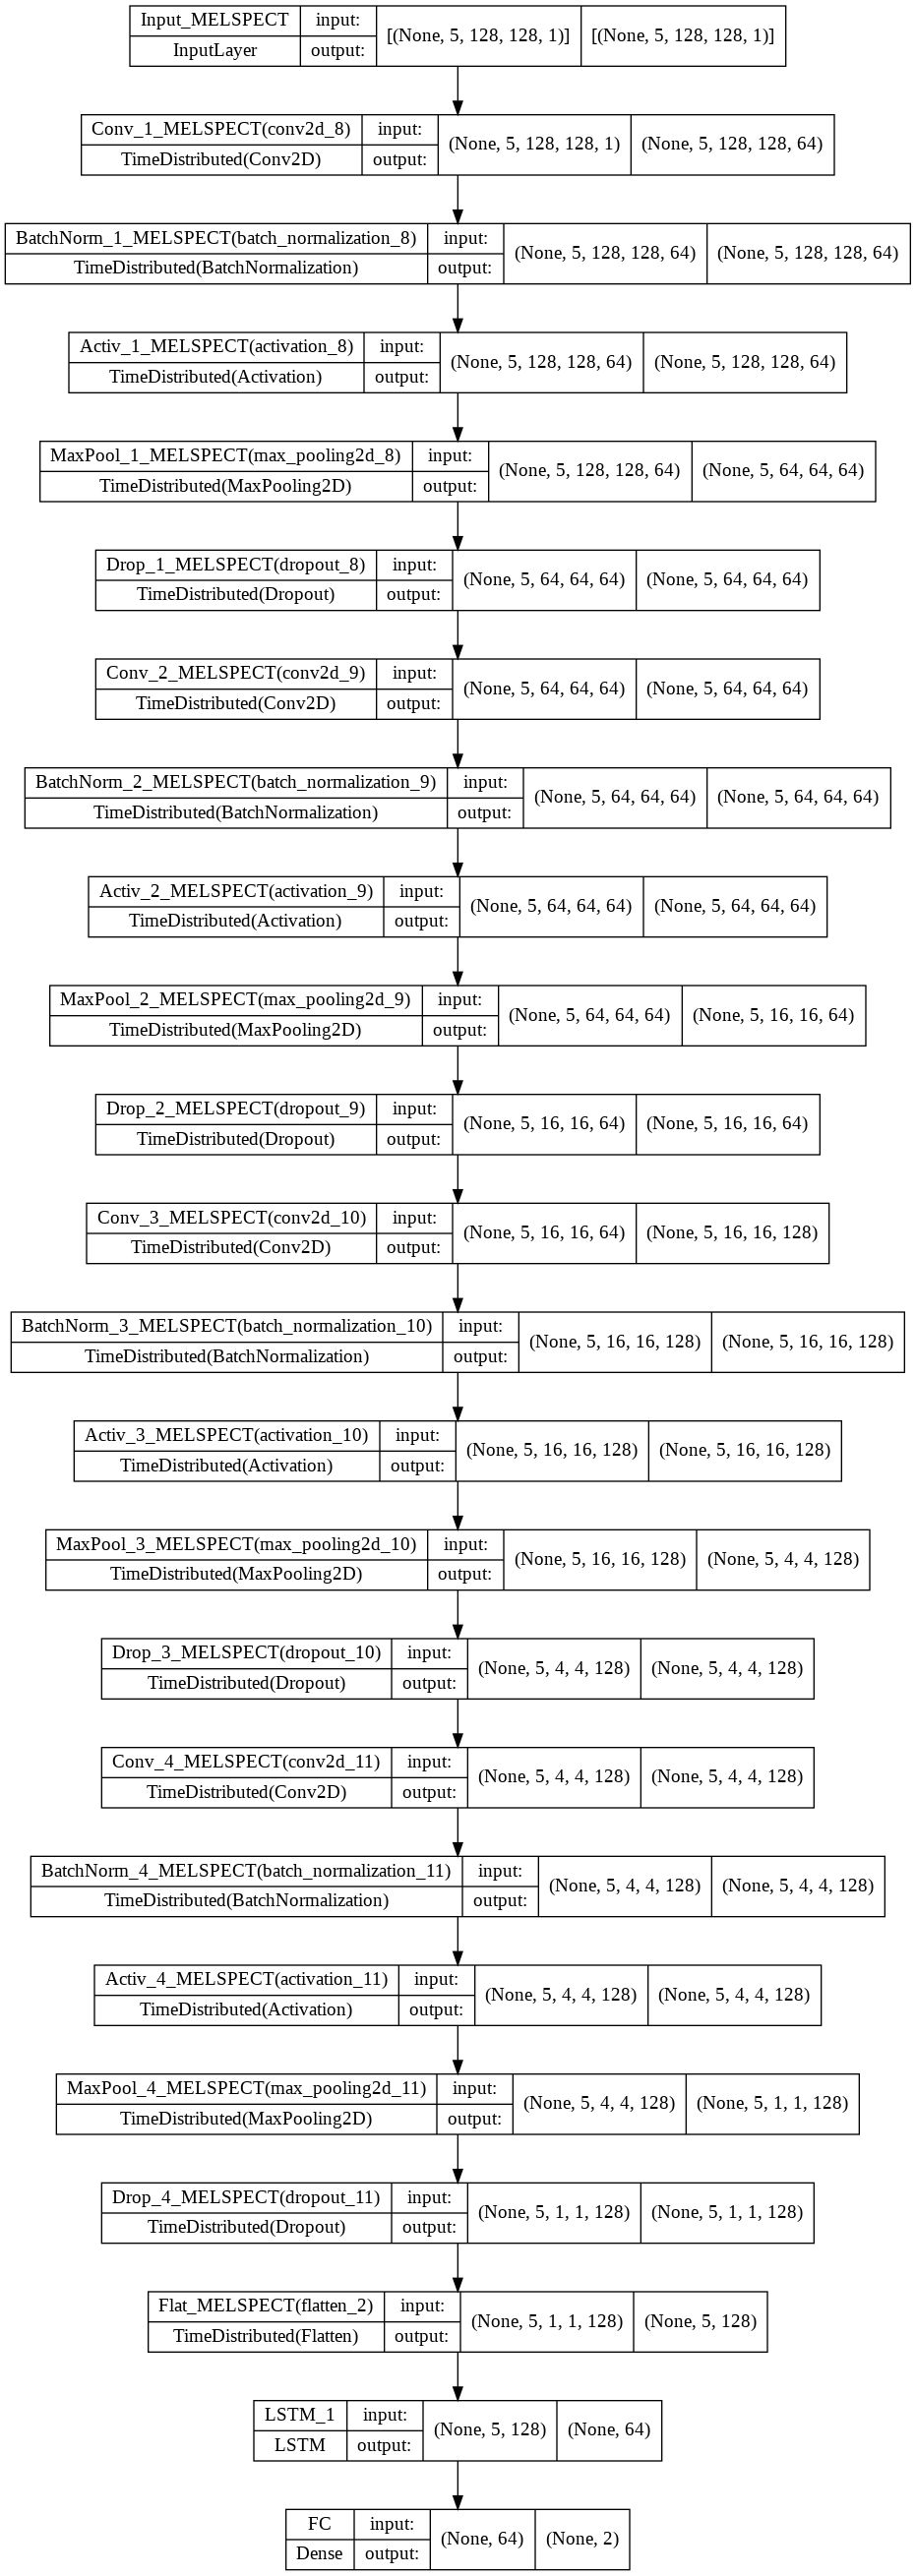

In [ ]:
#use this ------  in doc as fig 6


from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

In [ ]:
# Compile model
model.compile(optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.8), loss='categorical_crossentropy', metrics=['accuracy'])

# Save best model
#best_model_save = ModelCheckpoint('/content/drive/MyDrive/CNN-LSTM-logmel/model.hdf5', save_best_only=True, monitor='val_acc', mode='max')


# Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1, mode='max')

# Fit model
history = model.fit(X_train, y_train, batch_size=8, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
33/33 [==============================] - 8s 95ms/step - loss: 0.7308 - accuracy: 0.4922 - val_loss: 0.8157 - val_accuracy: 0.4545
Epoch 2/50
33/33 [==============================] - 2s 58ms/step - loss: 0.7124 - accuracy: 0.4729 - val_loss: 0.7090 - val_accuracy: 0.4545
Epoch 3/50
33/33 [==============================] - 2s 59ms/step - loss: 0.7162 - accuracy: 0.4302 - val_loss: 0.7065 - val_accuracy: 0.4545
Epoch 4/50
33/33 [==============================] - 2s 59ms/step - loss: 0.7038 - accuracy: 0.4729 - val_loss: 0.7029 - val_accuracy: 0.4545
Epoch 5/50
33/33 [==============================] - 2s 59ms/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6861 - val_accuracy: 0.6364
Epoch 6/50
33/33 [==============================] - 2s 59ms/step - loss: 0.6933 - accuracy: 0.5155 - val_loss: 0.6901 - val_accuracy: 0.4545
Epoch 7/50
33/33 [==============================] - 2s 59ms/step - loss: 0.6948 - accuracy: 0.5349 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 8/50
33

In [ ]:
# Compile model
model.compile(optimizer=Adam(lr=0.01, decay=1e-6), loss='binary_crossentropy', metrics=['accuracy'])

# Save best model
#best_model_save = ModelCheckpoint('/content/drive/MyDrive/CNN-LSTM-logmel/model.hdf5', save_best_only=True, monitor='val_acc', mode='max')


# Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')

# Fit model
history = model.fit(X_train, y_train, batch_size=8, epochs=70, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/70
33/33 [==============================] - 5s 76ms/step - loss: 0.7338 - accuracy: 0.4419 - val_loss: 0.7076 - val_accuracy: 0.4545
Epoch 2/70
33/33 [==============================] - 2s 60ms/step - loss: 0.7018 - accuracy: 0.4961 - val_loss: 0.6865 - val_accuracy: 0.5455
Epoch 3/70
33/33 [==============================] - 2s 59ms/step - loss: 0.7030 - accuracy: 0.4496 - val_loss: 0.6893 - val_accuracy: 0.5455
Epoch 4/70
33/33 [==============================] - 2s 59ms/step - loss: 0.6960 - accuracy: 0.5078 - val_loss: 0.6943 - val_accuracy: 0.4545
Epoch 5/70
33/33 [==============================] - 2s 59ms/step - loss: 0.6975 - accuracy: 0.4922 - val_loss: 0.7096 - val_accuracy: 0.4545
Epoch 6/70
33/33 [==============================] - 2s 59ms/step - loss: 0.6975 - accuracy: 0.4884 - val_loss: 0.6893 - val_accuracy: 0.5455
Epoch 7/70
33/33 [==============================] - 2s 59ms/step - loss: 0.6927 - accuracy: 0.5426 - val_loss: 0.7055 - val_accuracy: 0.4545
Epoch 8/70
33

In [ ]:
# Compile model
model.compile(optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.8), loss='binary_crossentropy', metrics=['accuracy'])

# Save best model
#best_model_save = ModelCheckpoint('/content/drive/MyDrive/CNN-LSTM-logmel/model.hdf5', save_best_only=True, monitor='val_acc', mode='max')


# Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')

# Fit model
history = model.fit(X_train, y_train, batch_size=8, epochs=70, validation_data=(X_test, y_test))

Epoch 1/70
33/33 [==============================] - 5s 78ms/step - loss: 0.7287 - accuracy: 0.5039 - val_loss: 0.7085 - val_accuracy: 0.5000
Epoch 2/70
33/33 [==============================] - 2s 59ms/step - loss: 0.7004 - accuracy: 0.5116 - val_loss: 0.6867 - val_accuracy: 0.5455
Epoch 3/70
33/33 [==============================] - 2s 59ms/step - loss: 0.7311 - accuracy: 0.4612 - val_loss: 0.7408 - val_accuracy: 0.4545
Epoch 4/70
33/33 [==============================] - 2s 59ms/step - loss: 0.7152 - accuracy: 0.5116 - val_loss: 0.6735 - val_accuracy: 0.7273
Epoch 5/70
33/33 [==============================] - 2s 60ms/step - loss: 0.7130 - accuracy: 0.4612 - val_loss: 0.6647 - val_accuracy: 0.5909
Epoch 6/70
33/33 [==============================] - 2s 60ms/step - loss: 0.7086 - accuracy: 0.4806 - val_loss: 0.7113 - val_accuracy: 0.4545
Epoch 7/70
33/33 [==============================] - 2s 60ms/step - loss: 0.6973 - accuracy: 0.5271 - val_loss: 0.6681 - val_accuracy: 0.6818
Epoch 8/70
33

In [ ]:
# Compile model
model.compile(optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.8), loss='binary_crossentropy', metrics=['accuracy'])

# Save best model
#best_model_save = ModelCheckpoint('/content/drive/MyDrive/CNN-LSTM-logmel/model.hdf5', save_best_only=True, monitor='val_acc', mode='max')


# Early stopping
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1, mode='max')

history = model.fit(X_train, y_train, batch_size=8, epochs=70, validation_data=(X_test, y_test))

Epoch 1/50
33/33 [==============================] - 5s 78ms/step - loss: 0.0660 - accuracy: 0.9845 - val_loss: 2.1300 - val_accuracy: 0.5909
Epoch 2/50
33/33 [==============================] - 2s 60ms/step - loss: 0.0399 - accuracy: 0.9845 - val_loss: 1.5186 - val_accuracy: 0.7727
Epoch 3/50
33/33 [==============================] - 2s 60ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 1.8099 - val_accuracy: 0.7727
Epoch 4/50
33/33 [==============================] - 2s 60ms/step - loss: 0.0093 - accuracy: 0.9961 - val_loss: 2.4628 - val_accuracy: 0.5455
Epoch 5/50
33/33 [==============================] - 2s 60ms/step - loss: 0.0475 - accuracy: 0.9729 - val_loss: 2.7058 - val_accuracy: 0.5000
Epoch 6/50
33/33 [==============================] - 2s 60ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 2.2671 - val_accuracy: 0.6364
Epoch 7/50
33/33 [==============================] - 2s 60ms/step - loss: 0.0126 - accuracy: 0.9922 - val_loss: 2.1046 - val_accuracy: 0.6818
Epoch 8/50
33

In [ ]:
xval=X_test
yval=y_test
history = model.fit(X_train, y_train, batch_size=8, epochs=100, validation_data=(xval, yval), callbacks=[early_stopping])

Epoch 1/100
33/33 [==============================] - 2s 62ms/step - loss: 0.3459 - accuracy: 0.8295 - val_loss: 0.9665 - val_accuracy: 0.7273
Epoch 2/100
33/33 [==============================] - 2s 60ms/step - loss: 0.3011 - accuracy: 0.8798 - val_loss: 0.8591 - val_accuracy: 0.7727
Epoch 3/100
33/33 [==============================] - 2s 60ms/step - loss: 0.3672 - accuracy: 0.8488 - val_loss: 0.7992 - val_accuracy: 0.7727
Epoch 4/100
33/33 [==============================] - 2s 60ms/step - loss: 0.2912 - accuracy: 0.8837 - val_loss: 0.9767 - val_accuracy: 0.7273
Epoch 5/100
33/33 [==============================] - 2s 60ms/step - loss: 0.2415 - accuracy: 0.9070 - val_loss: 0.8014 - val_accuracy: 0.5909
Epoch 6/100
33/33 [==============================] - 2s 60ms/step - loss: 0.2823 - accuracy: 0.8915 - val_loss: 1.2698 - val_accuracy: 0.5909
Epoch 7/100
33/33 [==============================] - 2s 60ms/step - loss: 0.2351 - accuracy: 0.9109 - val_loss: 1.0215 - val_accuracy: 0.6818
Epoch 